# Detección de ataques en tráfico de API usando Random Forest

Este notebook muestra cómo entrenar un modelo de Random Forest para detectar ataques en tráfico de API a partir de un archivo CSV generado por logs. El objetivo es clasificar las peticiones como normales o anómalas (ataques) usando técnicas de machine learning supervisado.

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns

In [3]:
# Cargar y explorar el archivo CSV
df = pd.read_csv('api_logs_ml_ready.csv')
df.head()

,timestamp,http_method,endpoint,query_params_count,user_agent,authorization_present,ip_hash,content_length_bytes,num_fields,avg_field_length,failed_auth_attempts_last_10min,suspicious_patterns_detected,statusCode,duration_ms,responseSize,label_attack
0,2025-08-20T19:04:08.339Z,POST,/api/v1/auth/signup,0,python-requests/2.32.4,False,eff8e7ca506627fe15dda5e0e512fcaad70b6d520f37cc...,50,2,9.000000,1,suspicious_quotes_or_escape,403,557.14,44,1
1,2025-08-20T19:04:08.916Z,POST,/api/v1/auth/signin,0,python-requests/2.32.4,False,eff8e7ca506627fe15dda5e0e512fcaad70b6d520f37cc...,50,2,9.000000,1,suspicious_quotes_or_escape,201,344.61,244,1
2,2025-08-20T19:04:09.269Z,POST,/api/v1/book,0,python-requests/2.32.4,True,eff8e7ca506627fe15dda5e0e512fcaad70b6d520f37cc...,69,3,8.333333,1,"authorization_header_present,suspicious_quotes...",500,208.35,46,1
3,2025-08-20T19:04:09.487Z,GET,/api/v1/book,0,python-requests/2.32.4,True,eff8e7ca506627fe15dda5e0e512fcaad70b6d520f37cc...,0,0,0.000000,1,"authorization_header_present,suspicious_quotes...",200,42.65,14360,0
4,2025-08-20T19:04:09.569Z,POST,/api/v1/auth/signup,0,python-requests/2.32.4,False,eff8e7ca506627fe15dda5e0e512fcaad70b6d520f37cc...,50,2,9.000000,1,suspicious_quotes_or_escape,403,41.83,44,1


In [4]:
# Preprocesamiento de datos
# Eliminar columnas irrelevantes y manejar nulos
df = df.dropna()

# Seleccionar variables relevantes (ajusta según tu CSV)
features = [
    'http_method', 'endpoint', 'query_params_count', 'user_agent',
    'authorization_present', 'content_length_bytes', 'num_fields',
    'avg_field_length', 'failed_auth_attempts_last_10min',
    'statusCode', 'duration_ms', 'responseSize'
]
X = df[features]
y = df['label_attack']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['http_method', 'endpoint', 'user_agent'], drop_first=True)

In [5]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f'Tamaño entrenamiento: {X_train.shape}, Tamaño prueba: {X_test.shape}')

Tamaño entrenamiento: (413, 137), Tamaño prueba: (177, 137)


In [6]:
# Entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print('Modelo entrenado.')

Modelo entrenado.


In [7]:
# Evaluar el modelo
preds = rf.predict(X_test)
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {rec:.3f}')
print('Reporte de clasificación:')
print(classification_report(y_test, preds))

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       156

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



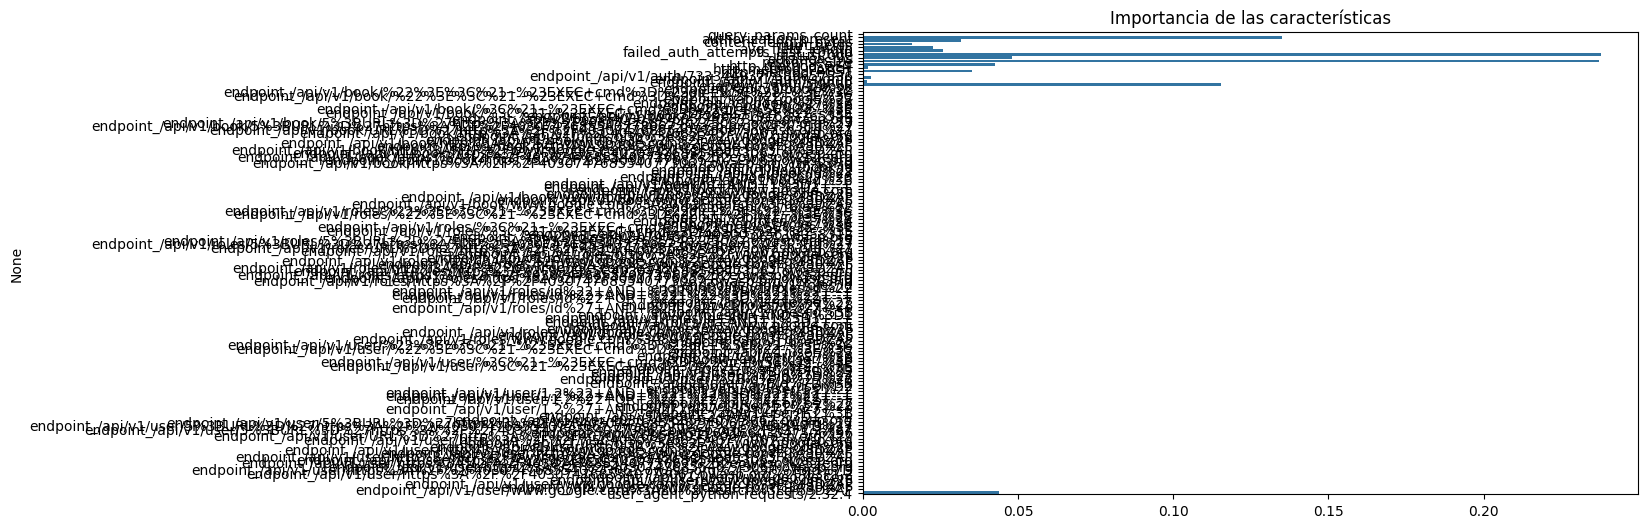

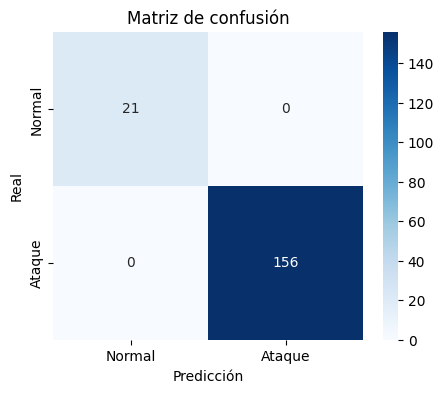

In [8]:
# Visualizar resultados
plt.figure(figsize=(10,6))
importances = rf.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title('Importancia de las características')
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Ataque'], yticklabels=['Normal','Ataque'])
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()